The size of the training "X" (input features) is (108, 4)


The size of our testing "X" (input features) is (27, 4)


The size of the training "y" (output features) is (108,)


The size of the training "y" (output features) is (27,)
              precision    recall  f1-score   support

           0       0.38      0.38      0.38         8
           1       0.74      0.74      0.74        19

    accuracy                           0.63        27
   macro avg       0.56      0.56      0.56        27
weighted avg       0.63      0.63      0.63        27



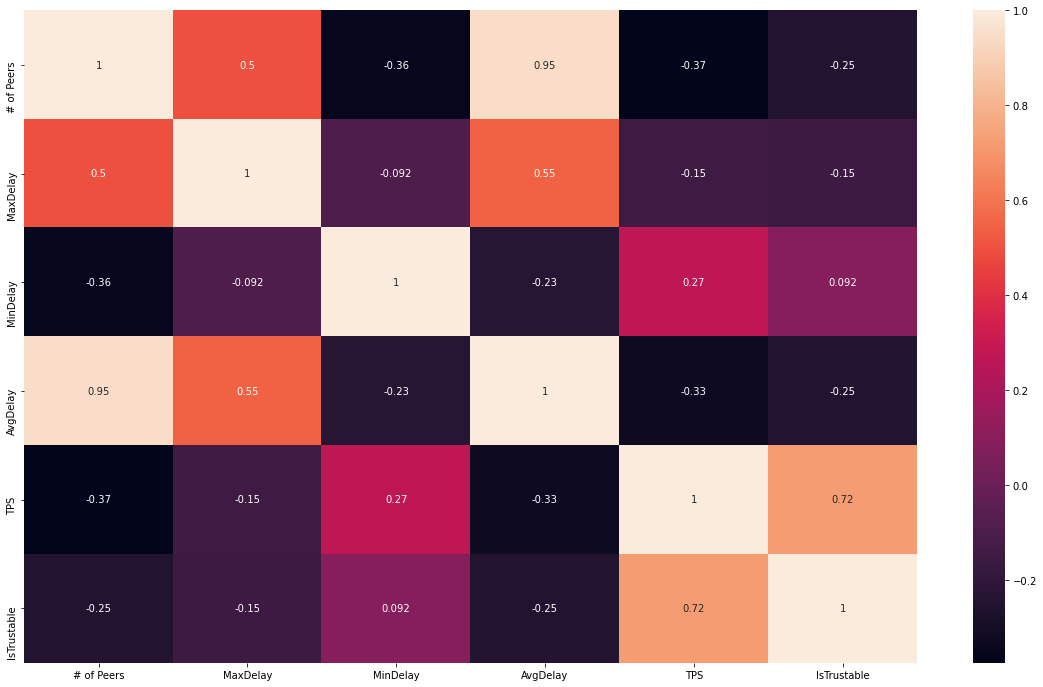

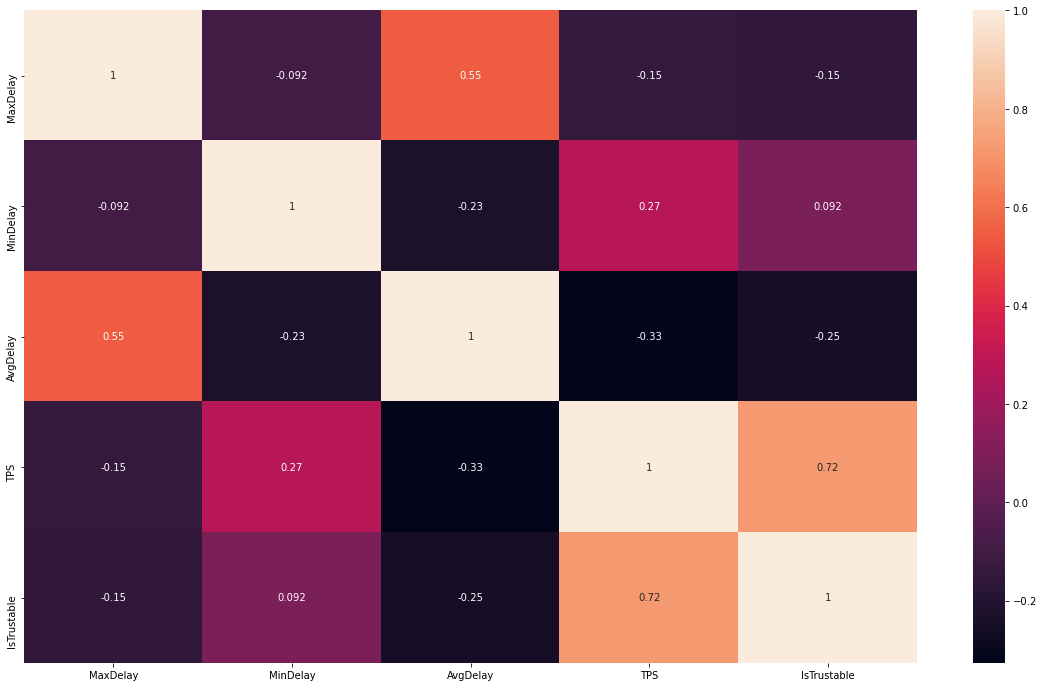

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Import cancer data from the Sklearn library.
#Dataset can also be found here

#rom sklearn.datasets import load_breast_cancer
dataset = pd.read_csv('/home/inlab/Downloads/100SVM.csv')
dataset.head()
plt.figure(figsize=(20,12))
sns.heatmap(dataset.corr('pearson'), annot=True)
dataset.corr('pearson')

X = dataset.drop(['IsTrustable'], axis=1)#drop the targer feature and use all the remaining features in our datafile
X.head()
X1= dataset.drop(['# of Peers'], axis=1)
y = dataset['IsTrustable']
y.head()

plt.figure(figsize=(20,12))
sns.heatmap(X1.corr('pearson'), annot=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)
X_train1= X_train.drop(['TPS'], axis=1)
X_test1= X_test.drop(['TPS'], axis=1)

print('The size of the training "X" (input features) is', X_train1.shape)
print('\n')
print('The size of our testing "X" (input features) is', X_test1.shape)
print('\n')
print('The size of the training "y" (output features) is', y_train.shape)
print('\n')
print('The size of the training "y" (output features) is', y_test.shape)

from sklearn.svm import SVC
svc_model = SVC(C=1.0, cache_size=200,class_weight=None, coef0=0.0,decision_function_shape='ovr',degree=3,gamma='auto',kernel='rbf',max_iter=-1,probability=False,random_state=None,shrinking=True,tol=0.001,verbose=False)

svc_model.fit(X_train1, y_train)
y_predict = svc_model.predict(X_test1)

from sklearn.metrics import classification_report, confusion_matrix
cm = np.array(confusion_matrix(y_test,y_predict,labels=[1,0]))
confusion = pd.DataFrame(cm,index=['is_Trustable', 'is_notTrustable'],
                    columns=['predicted_Trustable','predicted_notTrustable'])
confusion

print(classification_report(y_test, y_predict))